In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [3]:
data=pd.read_csv('../data/raw/UCI_Credit_Card.csv')

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
print("Quantidade de linhas:",data.shape[0])

Quantidade de linhas: 30000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
round(data.isnull().sum() / len(data) * 100, 2).sort_values(ascending=False) 

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64

In [13]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.50,8660.40,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.60,0.49,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.85,0.79,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.55,0.52,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.49,9.22,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.02,1.12,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.13,1.20,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.17,1.20,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.22,1.17,-2.0,-1.00,0.0,0.00,8.0


In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data['default.payment.next.month'].value_counts(normalize=True)

default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [21]:
percentuais=data['default.payment.next.month'].value_counts(normalize=True).mul(100).reset_index().rename(columns={'default.payment.next.month': 'Default', 'proportion': 'Percentual'})

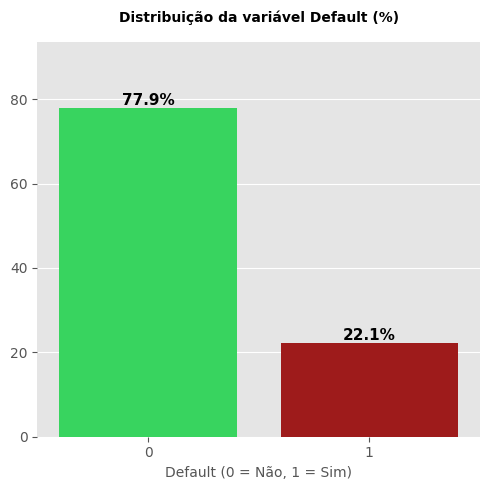

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
bars = sns.barplot(
    data=percentuais,
    x='Default',
    y='Percentual',
    ax=ax,
    palette=["#1EEE52","#B40505"] 
)

ax.set_title("Distribuição da variável Default (%)", fontsize=10, weight='bold', pad=15)
ax.set_xlabel("Default (0 = Não, 1 = Sim)", fontsize=10)
ax.set_ylabel("", fontsize=10)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=11, weight='bold')

sns.despine(left=True, bottom=True)
ax.set_ylim(0, percentuais['Percentual'].max() * 1.2)
plt.tight_layout()
plt.show()


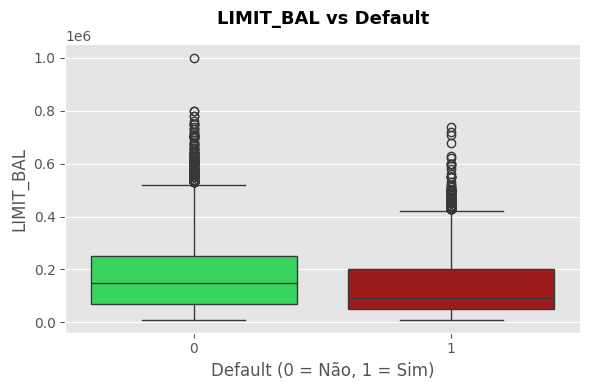

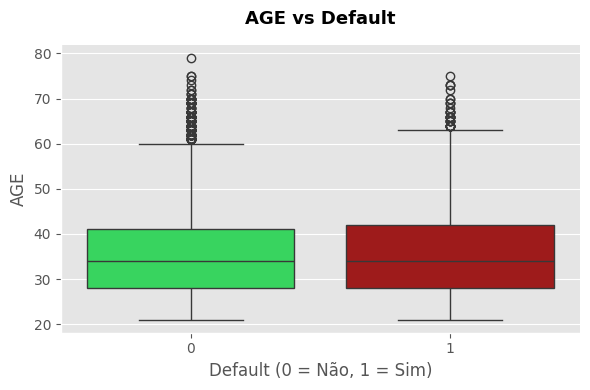

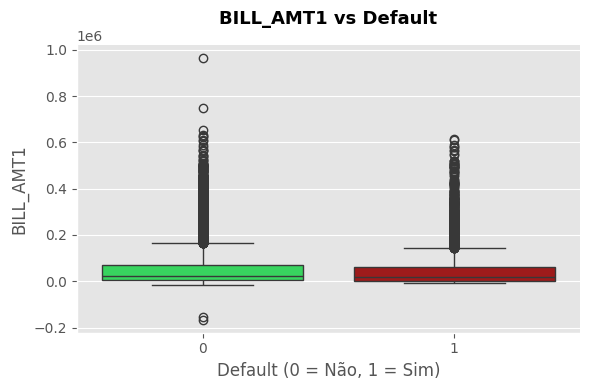

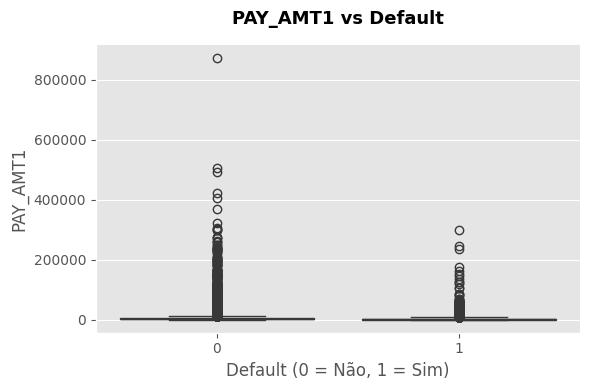

In [25]:
numeric_vars = ["LIMIT_BAL", "AGE", "BILL_AMT1", "PAY_AMT1"]  

for col in numeric_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        data=data,
        x="default.payment.next.month",
        y=col,
        palette=["#1EEE52","#B40505"] 
    )
    plt.title(f"{col} vs Default", fontsize=13, weight="bold", pad=15)
    plt.xlabel("Default (0 = Não, 1 = Sim)")
    plt.ylabel(col)
    sns.despine()
    plt.tight_layout()
    plt.show()
